# Introducción

El siguiente *notebook* consiste en la tarea para el módulo 4, "Machine Learning I - Algoritmos de aprendizaje no supervisado", del Diplomado en Data Science de la Universidad de Santiago de Chile.

Para el desarrollo de este se solicitó que, ocupando la base de datos "brandrating.csv" se realice un análisis PCA con el fin de responder a las siguientes preguntas:

1. Realizar un heatmap de correlación entre los atributos
2. Calcular los componentes principales. ¿Cuál es la proporción de la varianza explicada acumulada hasta el componente principal 3?
3. Grafique la varianza explicada para 9 componentes principales
4. Crear un dataframe y heatmap con con los componentes principales y los atributos. ¿Qué significa que el valor en la celda "componente principal 2" / "leader", sea alto?¿Qué valor es?
5. Utilizando el promedio como agregación ¿Cuáles son los atributos dónde la marca e es mejor que la marca a?

Alumno: Martín Bonnefoy Valdés

# Librerías ocupadas y cargado de la base de datos

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns


In [2]:
data = pd.read_csv("brandrating.csv")

# 2. Exploración de datos

In [3]:
data.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [4]:
data.dtypes

perform     int64
leader      int64
latest      int64
fun         int64
serious     int64
bargain     int64
value       int64
trendy      int64
rebuy       int64
brand      object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   perform  1000 non-null   int64 
 1   leader   1000 non-null   int64 
 2   latest   1000 non-null   int64 
 3   fun      1000 non-null   int64 
 4   serious  1000 non-null   int64 
 5   bargain  1000 non-null   int64 
 6   value    1000 non-null   int64 
 7   trendy   1000 non-null   int64 
 8   rebuy    1000 non-null   int64 
 9   brand    1000 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


In [6]:
data.isnull().sum()

perform    0
leader     0
latest     0
fun        0
serious    0
bargain    0
value      0
trendy     0
rebuy      0
brand      0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
perform,1000.0,4.488,3.203454,1.0,1.0,4.0,7.0,10.0
leader,1000.0,4.417,2.608432,1.0,2.0,4.0,6.0,10.0
latest,1000.0,6.195,3.078059,1.0,4.0,7.0,9.0,10.0
fun,1000.0,6.068,2.744250,1.0,4.0,6.0,8.0,10.0
serious,1000.0,4.323,2.778199,1.0,2.0,4.0,6.0,10.0
bargain,1000.0,4.259,2.667027,1.0,2.0,4.0,6.0,10.0
value,1000.0,4.337,2.398580,1.0,2.0,4.0,6.0,10.0
trendy,1000.0,5.220,2.742101,1.0,3.0,5.0,7.0,10.0
rebuy,1000.0,3.727,2.544592,1.0,1.0,3.0,5.0,10.0


Se identifica que no habría que realizar un preprocesamiento sobre la base de datos, al no contener datos nulos.

# Estandarizado

In [9]:
data_escalado = data.copy()

In [10]:
data_escalado

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a
...,...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j


In [11]:
columnas = list(data_escalado.columns.values)[0:9]

features = data_escalado[columnas]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [12]:
data_escalado[columnas] = features
data_escalado.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.77705,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.08937,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.77705,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.08937,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.08937,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a


Revisión de estandarización:

In [13]:
np.mean(data_escalado)

c:\Users\Martín\Archivos\Clases\Diplomado DS\Notebook\venv_dds\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Martín\Archivos\Clases\Diplomado DS\Notebook\venv_dds\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


perform   -1.563194e-16
leader     8.526513e-17
latest    -1.136868e-16
fun        1.421085e-16
serious   -5.684342e-17
bargain   -1.136868e-16
value      1.136868e-16
trendy     9.947598e-17
rebuy      4.263256e-17
dtype: float64

In [14]:
np.std(data_escalado)

c:\Users\Martín\Archivos\Clases\Diplomado DS\Notebook\venv_dds\lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


perform    1.0
leader     1.0
latest     1.0
fun        1.0
serious    1.0
bargain    1.0
value      1.0
trendy     1.0
rebuy      1.0
dtype: float64

In [15]:
mean = np.mean(data_escalado)
np.round(mean, decimals=1)

c:\Users\Martín\Archivos\Clases\Diplomado DS\Notebook\venv_dds\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Martín\Archivos\Clases\Diplomado DS\Notebook\venv_dds\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


perform   -0.0
leader     0.0
latest    -0.0
fun        0.0
serious   -0.0
bargain   -0.0
value      0.0
trendy     0.0
rebuy      0.0
dtype: float64

Se confirma que la estandarización se realizó correctamente.

In [16]:
data = data_escalado.copy()

# Heatmap de correlación entre los atributos

C:\Users\Martín\AppData\Local\Temp\ipykernel_32708\3881294046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(data_escalado.corr(), cmap='YlGnBu_r')


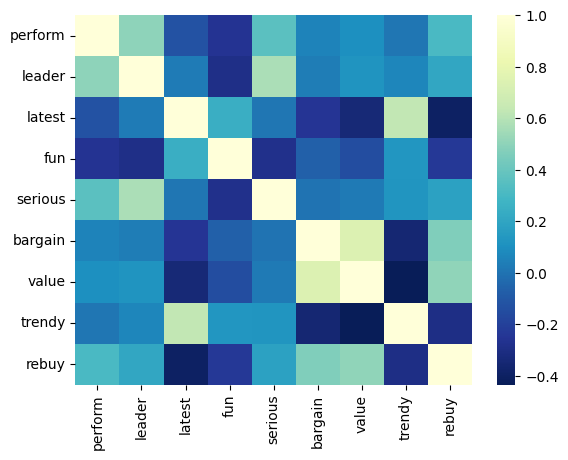

In [17]:
s = sns.heatmap(data_escalado.corr(), cmap='YlGnBu_r')
plt.show()

# Cálculo de la covarianza

In [18]:
columnas = list(data_escalado.columns.values)[0:9]

In [19]:
# Se genera el dataframe data2, restando la columna de 'brand' al causar esta problemas en el cálculo de covarianza por estar compuesta de strings

data2 = data[columnas].copy()

In [20]:
data2_cov = np.cov(data2)

In [21]:
print(data2_cov.shape)

(1000, 1000)


In [22]:
print(data2_cov)

[[ 8.32195302e-01  9.38660241e-02  8.61441264e-01 ...  6.16264085e-01
   1.52730326e-04 -4.27718778e-01]
 [ 9.38660241e-02  2.90258007e-01  2.22472570e-01 ...  3.25545408e-01
   1.32295586e-01  1.82768671e-01]
 [ 8.61441264e-01  2.22472570e-01  1.16265334e+00 ...  5.45131798e-01
  -1.61201752e-01 -3.83348595e-01]
 ...
 [ 6.16264085e-01  3.25545408e-01  5.45131798e-01 ...  1.10353705e+00
   3.96776790e-01  4.20530733e-02]
 [ 1.52730326e-04  1.32295586e-01 -1.61201752e-01 ...  3.96776790e-01
   3.24634483e-01  1.76895173e-01]
 [-4.27718778e-01  1.82768671e-01 -3.83348595e-01 ...  4.20530733e-02
   1.76895173e-01  5.53676344e-01]]


# Cálculo de los componentes principales

In [23]:
data2.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,-0.77705,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714
1,-1.08937,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034
2,-0.77705,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714
3,-1.08937,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221
4,-1.08937,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221


In [24]:
# Ocupando la totalidad de las 9 dimensiones contenidas

pca = PCA(n_components=9)
pca.fit(data2)

PCA(n_components=9)

In [25]:
pca9 = pca.transform(data2)

In [26]:
pca9

array([[ 1.01036278, -1.62300786,  1.81527558, ...,  0.55514877,
        -0.29133343, -0.41593993],
       [-1.53720937, -1.83677187, -2.00276587, ...,  0.28822721,
        -0.37788251, -0.24118947],
       [ 1.21200083, -2.30192495,  0.69760145, ...,  0.32391032,
        -0.54390044, -1.06393714],
       ...,
       [-1.42307927, -2.09564259,  1.43414192, ..., -0.07968735,
        -0.52145708, -0.02909572],
       [-2.08552324, -1.19425256, -1.27692351, ...,  0.1358329 ,
        -0.24524473,  0.16700233],
       [-1.50570199,  0.47303273, -0.73876216, ..., -0.31377098,
        -0.30161079,  0.19153493]])

In [27]:
pca9.shape

(1000, 9)

In [28]:
data2.shape

(1000, 9)

In [31]:
print('Varianza explicada PCA:\n')

expl = pca.explained_variance_ratio_
print(expl)

print('\nSuma de primeros 5 componentes principales:', sum(expl[0:5]))

Varianza explicada PCA:

[0.33103284 0.23295019 0.11991721 0.08080122 0.07083844 0.05942703
 0.04334494 0.03467182 0.02701632]

Suma de primeros 5 componentes principales: 0.8355398914471838


In [30]:
print('Varianza explicada PCA:\n')

expl = pca.explained_variance_ratio_
print(expl)

print('\nSuma de primeros 3 componentes principales:', sum(expl[0:2]))

Varianza explicada PCA:

[0.33103284 0.23295019 0.11991721 0.08080122 0.07083844 0.05942703
 0.04334494 0.03467182 0.02701632]

Suma de primeros 3 componentes principales: 0.5639830264065925


De acuerdo a lo anterior, los 3 primeros componentes explicarían el 56,39% de la varianza.
Esto se considera una cantidad baja, por lo que se recomendaría aumentar la cantidad de componentes principales considerados.

In [32]:
for i in range(1,10):
    print(f"{i} PC: {sum(expl[0:i])}")

1 PC: 0.3310328402009897
2 PC: 0.5639830264065925
3 PC: 0.6839002346857316
4 PC: 0.7647014562886022
5 PC: 0.8355398914471838
6 PC: 0.8949669167962965
7 PC: 0.9383118542892749
8 PC: 0.9729836787955617
9 PC: 0.9999999999999999


Se podría considerar que entre 4 y 5 componentes principales sería una solución óptima.

# Graficar varianza explicada

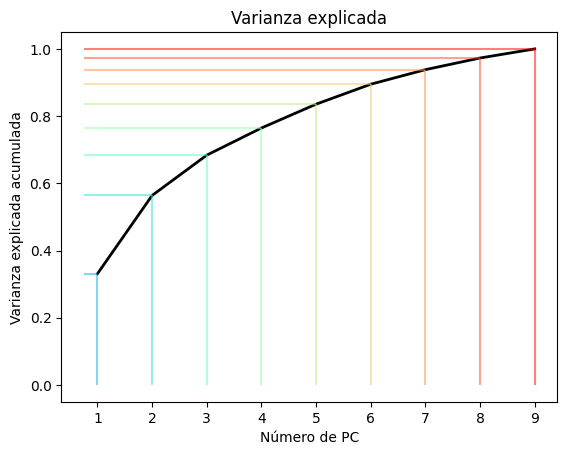

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2, color='black')

plt.title('Varianza explicada')
plt.xlabel('Número de PC')
plt.ylabel('Varianza explicada acumulada')

color = cm.rainbow(np.linspace(.25, 1, 9))

for i, c in zip(range(0,10), color):
    plt.vlines(i, 0, sum(expl[0:i+1]), colors=c, alpha=0.5)
    plt.hlines(sum(expl[0:i+1]), -.25, i, colors=c, alpha=0.5)


labels = list(range(0,9))
labels2 = list(range(1,10))
plt.xticks(labels, labels2)


plt.show()

# Redefinir PCA para 2 componentes

In [34]:
pca2 = PCA(n_components=2)
pca2.fit(data2)
pca_2 = pca2.transform(data2)

In [ ]:
# pca2 = PCA(n_components=2)
# pca2.fit(data)
# pca_2 = pca2.transform(data)

In [37]:
print('Varianza explicada PCA:\n')

expl2 = pca2.explained_variance_ratio_
print(expl2)

print('\nSuma de los 2 componentes principales:', sum(expl[0:2]))

Varianza explicada PCA:

[0.33103284 0.23295019]

Suma de los 2 componentes principales: 0.5639830264065925


In [39]:
pca2

PCA(n_components=2)

In [42]:
print(pca_2)

[[ 1.01036278 -1.62300786]
 [-1.53720937 -1.83677187]
 [ 1.21200083 -2.30192495]
 ...
 [-1.42307927 -2.09564259]
 [-2.08552324 -1.19425256]
 [-1.50570199  0.47303273]]


In [45]:
# Se genera un dataframe con el array resultante de pca_2

df_pca = pd.DataFrame(pca_2, columns = ['PC1','PC2'])

In [47]:
df_pca

,PC1,PC2
0,1.010363,-1.623008
1,-1.537209,-1.836772
2,1.212001,-2.301925
3,-0.818096,-0.731440
4,0.897439,-3.273833
...,...,...
995,0.923271,-1.934065
996,-1.050549,-1.570814
997,-1.423079,-2.095643
998,-2.085523,-1.194253


In [48]:
# Se genera un dataframe combinado entre la totalidad de la base de datos estandarizada y los resultados de PCA

data_pca = data.join(df_pca)

In [49]:
data_pca

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand,PC1,PC2
0,-0.777050,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a,1.010363,-1.623008
1,-1.089370,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a,-1.537209,-1.836772
2,-0.777050,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a,1.212001,-2.301925
3,-1.089370,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a,-0.818096,-0.731440
4,-1.089370,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a,0.897439,-3.273833
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.777050,-0.927074,-1.038511,-0.024791,-0.116321,1.403387,0.276552,-1.539736,-0.679034,j,0.923271,-1.934065
996,-0.464731,-0.927074,-0.063383,0.339789,-1.196697,-0.472297,-0.557692,-1.174870,-1.072221,j,-1.050549,-1.570814
997,-1.089370,-1.310638,1.236787,1.433531,-1.196697,0.653113,0.276552,-0.080271,-0.679034,j,-1.423079,-2.095643
998,-1.089370,-1.310638,0.261659,-0.389372,-1.196697,-1.222571,-0.974814,-0.080271,-1.072221,j,-2.085523,-1.194253


In [56]:
print(data_pca['brand'].unique())

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']


In [50]:
# Se genera una función para asignar un número a cada letra de "brand", con el fin de que se puedan identificar en visualizaciones

def brand_color(x):
    if x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    elif x == 'd':
        return 4
    elif x == 'e':
        return 5
    elif x == 'f':
        return 6
    elif x == 'g':
        return 7
    elif x == 'h':
        return 8
    elif x == 'i':
        return 9
    else:
        return 10

In [51]:
data_pca['c'] = data_pca['brand'].map(brand_color)

In [52]:
data_pca

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand,PC1,PC2,c
0,-0.777050,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a,1.010363,-1.623008,1
1,-1.089370,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a,-1.537209,-1.836772,1
2,-0.777050,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a,1.212001,-2.301925,1
3,-1.089370,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a,-0.818096,-0.731440,1
4,-1.089370,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a,0.897439,-3.273833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.777050,-0.927074,-1.038511,-0.024791,-0.116321,1.403387,0.276552,-1.539736,-0.679034,j,0.923271,-1.934065,10
996,-0.464731,-0.927074,-0.063383,0.339789,-1.196697,-0.472297,-0.557692,-1.174870,-1.072221,j,-1.050549,-1.570814,10
997,-1.089370,-1.310638,1.236787,1.433531,-1.196697,0.653113,0.276552,-0.080271,-0.679034,j,-1.423079,-2.095643,10
998,-1.089370,-1.310638,0.261659,-0.389372,-1.196697,-1.222571,-0.974814,-0.080271,-1.072221,j,-2.085523,-1.194253,10


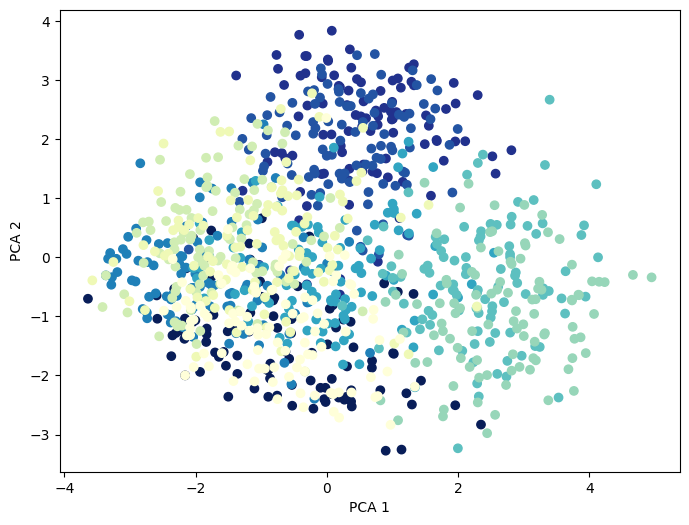

In [53]:
plt.figure(figsize=(8,6))

color_dict = { 'a':'red', 'b':'blue', 'c':'black', 'd':'green','e':'purple','f':'purple','g':'purple','h':'purple','i':'purple','j':'purple' }

plt.scatter(data_pca.PC1, data_pca.PC2, c=data_pca.c ,cmap='YlGnBu_r')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [57]:
pca2

PCA(n_components=2)

# Generación de dataframe con los PC y los atributos

In [60]:
data_comp = pd.DataFrame(pca2.components_, columns=columnas)

In [61]:
data_comp

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,0.237468,0.205826,-0.370381,-0.25106,0.159740,0.399173,0.447456,-0.351029,0.439018
1,0.419912,0.523819,0.201453,-0.25038,0.510473,-0.218497,-0.189808,0.318490,0.015098


<Axes: >

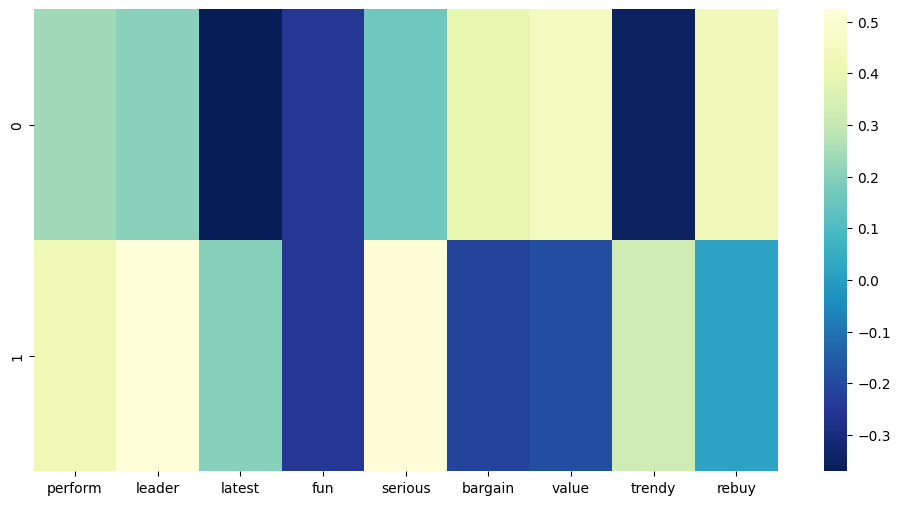

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(data_comp, cmap='YlGnBu_r')

De acuerdo a lo que se puede identificar en el heatmap, se puede señalar sobre ambos PC:

El primero (0) Se correspondería principalmente con features asociados al valor del producto, siendo los tres principales features "bargain", "value" y "rebuy".

El segundo (1) se correspondería principalmente con los features "leader", "serious" y "perform". Desde esto, es posible de inferir que se corresponde a atributos de confianza de marca, posicionamiento en mercado, etcétera.

# Comparación de marcas

In [67]:
data

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.777050,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.089370,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.777050,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.089370,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.089370,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a
...,...,...,...,...,...,...,...,...,...,...
995,-0.777050,-0.927074,-1.038511,-0.024791,-0.116321,1.403387,0.276552,-1.539736,-0.679034,j
996,-0.464731,-0.927074,-0.063383,0.339789,-1.196697,-0.472297,-0.557692,-1.174870,-1.072221,j
997,-1.089370,-1.310638,1.236787,1.433531,-1.196697,0.653113,0.276552,-0.080271,-0.679034,j
998,-1.089370,-1.310638,0.261659,-0.389372,-1.196697,-1.222571,-0.974814,-0.080271,-1.072221,j


In [68]:
data_brands = data.copy()

# Se filtra para solo tener las filas correspondientes a las marcas "a" y "e"

data_brands = data_brands[(data_brands['brand'] == 'a') | (data_brands['brand'] == 'e')]

In [69]:
data_brands

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.777050,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.089370,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.777050,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.089370,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.089370,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a
...,...,...,...,...,...,...,...,...,...,...
495,0.159907,0.223618,0.911744,0.704370,-0.116321,1.403387,1.110796,0.649462,-1.072221,e
496,-0.777050,-0.543510,1.236787,1.433531,-0.116321,1.778524,-0.140570,1.014328,-0.679034,e
497,-1.089370,1.374310,0.261659,0.339789,0.243805,0.653113,0.693674,-0.810003,-0.679034,e
498,-1.089370,-0.159946,1.236787,0.704370,-0.836572,0.653113,0.693674,1.744061,-0.679034,e


In [70]:
data_brands.describe().T

,count,mean,std,min,25%,50%,75%,max
perform,200.0,-0.725518,0.558147,-1.089370,-1.089370,-0.777050,-0.698970,1.409184
leader,200.0,-0.167617,0.928422,-1.310638,-0.927074,-0.159946,0.607182,2.141438
latest,200.0,0.433932,0.775180,-1.688596,-0.063383,0.586702,1.236787,1.236787
fun,200.0,0.476507,0.719421,-1.847695,-0.024791,0.339789,1.068950,1.433531
serious,200.0,-0.438633,0.647237,-1.196697,-0.836572,-0.476446,-0.116321,1.324182
bargain,200.0,0.383015,0.977919,-1.222571,-0.472297,0.277976,1.028250,2.153661
value,200.0,0.301579,0.857644,-1.391936,-0.140570,0.276552,0.693674,2.362162
trendy,200.0,-0.193379,0.785699,-1.539736,-0.810003,-0.080271,0.284596,1.744061
rebuy,200.0,-0.279949,0.864919,-1.072221,-1.072221,-0.679034,0.107340,2.466462


In [71]:
data_brands = data_brands.groupby(['brand']).mean()

In [72]:
data_brands

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,-0.886362,-0.528168,0.411179,0.656974,-0.919400,0.214203,0.184785,-0.525407,-0.596465
e,-0.564673,0.192933,0.456685,0.296039,0.042135,0.551826,0.418373,0.138649,0.036566


In [73]:
columnas

['perform',
 'leader',
 'latest',
 'fun',
 'serious',
 'bargain',
 'value',
 'trendy',
 'rebuy']

In [74]:
for i in columnas:
    diferencia = ( data_brands[i][1] - data_brands[i][0] )
    # print(f'Diferencia de {i} entre marca "e" y "a": {data_brands[i][1] - data_brands[i][0]}')
    print(f'Diferencia de {i} entre marca "e" y "a": {round(diferencia, 2)}')

Diferencia de perform entre marca "e" y "a": 0.32
Diferencia de leader entre marca "e" y "a": 0.72
Diferencia de latest entre marca "e" y "a": 0.05
Diferencia de fun entre marca "e" y "a": -0.36
Diferencia de serious entre marca "e" y "a": 0.96
Diferencia de bargain entre marca "e" y "a": 0.34
Diferencia de value entre marca "e" y "a": 0.23
Diferencia de trendy entre marca "e" y "a": 0.66
Diferencia de rebuy entre marca "e" y "a": 0.63


De acuerdo a lo anterior, es posible identificar que los atributos en los que la marca "e" es mejor que la marca "a" son (en orden descendiente):

- serious (0.96)
- leader (0.72)
- trendy (0.66)
- rebuy (0.63)